In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
logisticX_path = 'logisticX.csv'
logisticY_path = 'logisticY.csv'
logisticX = pd.read_csv(logisticX_path, header=None).values
logisticY = pd.read_csv(logisticY_path, header=None).values.flatten()

In [10]:
X_mean = np.mean(logisticX, axis=0)
X_std = np.std(logisticX, axis=0)
X_normalized = (logisticX - X_mean) / X_std

In [12]:
m, n = X_normalized.shape
X_intercept = np.hstack((np.ones((m, 1)), X_normalized))

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
# Cost function
def compute_cost(X, y, theta):
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # To avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

In [18]:
# Gradient descent for logistic regression
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        gradient = (1/m) * np.dot(X.T, sigmoid(np.dot(X, theta)) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

In [20]:
# Initialize parameters
theta = np.zeros(n + 1)
alpha = 0.1
iterations = 1000

In [22]:
# Train the model 
theta_optimal, cost_history = gradient_descent(X_intercept, logisticY, theta, alpha, iterations)

In [24]:
# Cost function value after convergence
print("Cost function value after convergence:", cost_history[-1])
print("Optimal theta:", theta_optimal)

Cost function value after convergence: 0.22908939844423176
Optimal theta: [ 0.32395465  2.38613663 -2.49462467]


In [27]:
# Plot dataset and decision boundary
plt.figure(figsize=(8, 6))
x1_min, x1_max = X_normalized[:, 0].min(), X_normalized[:, 0].max()
x2_min, x2_max = X_normalized[:, 1].min(), X_normalized[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], theta_optimal))
Z = Z.reshape(xx.shape)

<Figure size 800x600 with 0 Axes>

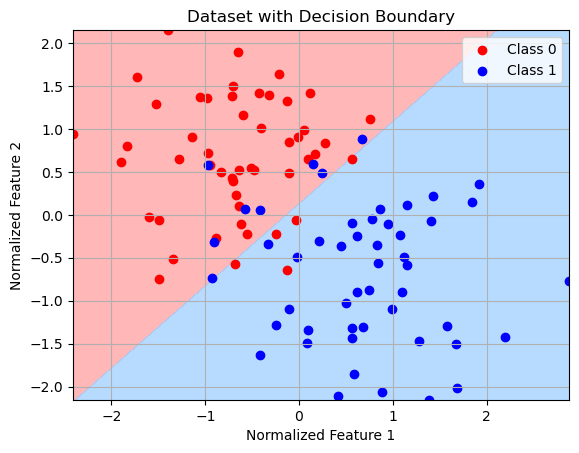

In [29]:
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.7, colors=["#ff9999", "#99ccff"])
plt.scatter(X_normalized[logisticY == 0, 0], X_normalized[logisticY == 0, 1], c='red', label='Class 0')
plt.scatter(X_normalized[logisticY == 1, 0], X_normalized[logisticY == 1, 1], c='blue', label='Class 1')
plt.title("Dataset with Decision Boundary")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [31]:

# Train the model with different learning rates
alpha_1 = 0.1
alpha_2 = 5
iterations_2 = 100

In [33]:
theta_1, cost_history_1 = gradient_descent(X_intercept, logisticY, np.zeros(n + 1), alpha_1, iterations_2)
theta_2, cost_history_2 = gradient_descent(X_intercept, logisticY, np.zeros(n + 1), alpha_2, iterations_2)

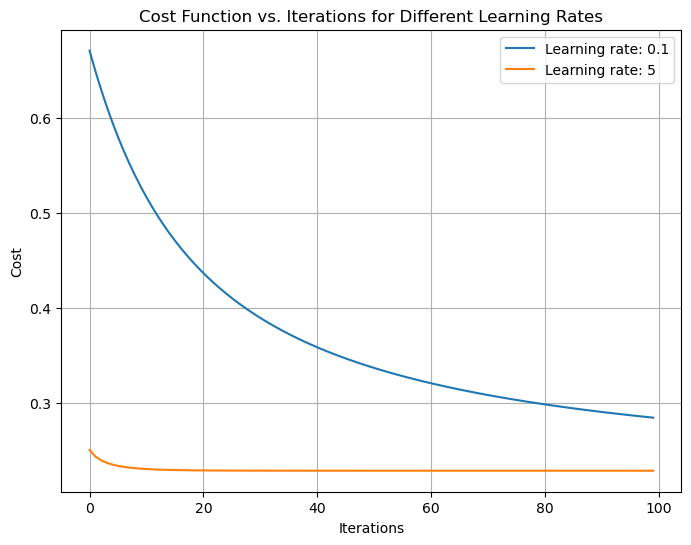

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(range(iterations_2), cost_history_1, label="Learning rate: 0.1")
plt.plot(range(iterations_2), cost_history_2, label="Learning rate: 5")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Confusion matrix and performance metrics
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

In [39]:
y_pred = predict(X_intercept, theta_optimal)

In [41]:
# Confusion matrix
confusion_matrix = np.zeros((2, 2))
for i in range(len(logisticY)):
    confusion_matrix[logisticY[i], y_pred[i]] += 1

In [43]:
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

In [45]:
print("Confusion Matrix:\n", confusion_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Confusion Matrix:
 [[45.  5.]
 [ 8. 42.]]
Accuracy: 0.87
Precision: 0.89
Recall: 0.84
F1-Score: 0.87
